In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


#### Import data files

In [2]:
df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')
data_dict=pd.read_csv('data/data_dictionary.csv')

# ignore warnings
warnings.filterwarnings('ignore')

#### Custom methods

In [157]:
def splitcategories(df):
    nums=df._get_numeric_data().columns
    cats=list(set(df.columns)-set(nums))
    return nums,cats

def filterColsbyNA(df,num):
    df.shape
    temp=pd.DataFrame(df.isna().sum()).reset_index()
    temp=temp.set_axis(['name','nullcount'],axis=1)
    temp['ratio']=temp.nullcount/df.shape[0]*100
    return temp.loc[temp.ratio>num].name.to_list()

def getsmallercols(df,limit):
    nums=df._get_numeric_data().columns.to_list()
    a=[]
    for col in nums:
        if df[col].value_counts().count() < limit:
            a.append(col)
    return a
def addBinnedCols(df,cols,binSize):
    y=list(map(lambda x:x/binSize ,list(range(1,binSize+1)))) 
    for col in cols:
        a=df[col].quantile(y).to_list()
        df[str(col)+'_binned']=df[col].apply(lambda x:getVal(a,x))
    return df
def get_dt_graph(dt_classifier,X):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['No Churn', "Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
def evaluate_model(dt_classifier,X_train,X_test,y_train,y_test):
    print("="*50+"Training data"+"="*50)
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    cm_train=confusion_matrix(y_train, dt_classifier.predict(X_train))
    TN,FP,FN,TP=cm_train.ravel()
    Precision=(TP) / (TP+FP)
    Recall = (TP) / (TP+FN)
    F1_train=2*(Precision*Recall)/(Precision+Recall)
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("Precision->%f"%Precision)
    print("Recall->%f"%Recall)
    print("F1_score->%f"%F1_train)
    print("-"*113)
    print("="*52+"Test data"+"="*52)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    cm_test=confusion_matrix(y_test, dt_classifier.predict(X_test))
    TN,FP,FN,TP=cm_test.ravel()
    Precision=(TP) / (TP+FP)
    Recall = (TP) / (TP+FN)
    F1_test=2*(Precision*Recall)/(Precision+Recall)
    print("Precision->%f"%Precision)
    print("Recall->%f"%Recall)
    print("F1_score->%f"%F1_test)
    print("-"*113)

#### Data cleaning

In [4]:
nums,cats = splitcategories(df)
print("Total number of categorical variables: %d"%len(cats))
[print('=> '+x) for x in cats]

# Ignoring date of recharge as not adding value to total data set, hence dropping

df.drop(columns=cats,inplace=True)
df.shape

Total number of categorical variables: 9
=> last_date_of_month_7
=> date_of_last_rech_data_7
=> last_date_of_month_8
=> date_of_last_rech_data_8
=> date_of_last_rech_6
=> date_of_last_rech_7
=> date_of_last_rech_8
=> last_date_of_month_6
=> date_of_last_rech_data_6


(69999, 163)

#### Exploratory data analysis

In [5]:
# Checking NA fields

# Visualizing columns with Null values between 1% and 10% of total data set
print("*"*110)
print(list(set(filterColsbyNA(df,1))-set(filterColsbyNA(df,10))))
print("*"*110)
# As most of the values are for mou which represents minutes of usage , we can safely impute by 0 in case of NaN

print("*"*110)
print(filterColsbyNA(df,10))
print("*"*110)

# Even columns with more than 10% of NaN is mostly of recharge 
# so an empty recharge is technically a zero amount recharge

**************************************************************************************************************
['og_others_8', 'loc_ic_t2f_mou_7', 'std_ic_mou_7', 'loc_og_t2f_mou_6', 'isd_og_mou_8', 'roam_ic_mou_6', 'std_og_t2m_mou_8', 'std_og_mou_8', 'std_ic_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_8', 'std_og_t2f_mou_6', 'roam_ic_mou_7', 'std_ic_t2f_mou_8', 'loc_ic_t2t_mou_6', 'std_og_mou_7', 'loc_og_t2t_mou_8', 'spl_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2t_mou_8', 'og_others_6', 'spl_og_mou_6', 'roam_og_mou_7', 'loc_og_mou_6', 'isd_og_mou_6', 'std_ic_t2o_mou_8', 'onnet_mou_7', 'std_og_t2c_mou_7', 'loc_ic_t2f_mou_6', 'std_ic_mou_8', 'loc_og_t2c_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'og_others_7', 'loc_og_t2t_mou_6', 'std_og_t2c_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_7', 'roam_og_mou_8', 'loc_ic_t2o_mou', 'isd_ic_mou_8', 'ic_others_6', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2c_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2c

#### Based on NaN analysis above, we would be imputing NaN for whole dataframe

In [6]:
df_imputed=df.fillna(0)


In [7]:
# columns with zero std deviation
temp=df_imputed.describe().transpose().reset_index().rename(columns={'index':'name'})
cols_to_remove=temp.loc[(temp['std']==0)].name.to_list()
cols_to_remove.append('id')




In [8]:
df_imputed.drop(columns=cols_to_remove,inplace=True,errors='ignore')
df_imputed.shape
cols_to_remove


['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'id']

In [9]:
X=df_imputed[set(df_imputed.columns)-set(['churn_probability'])]
y=df_imputed.churn_probability

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

### Principal component analysis

In [60]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [148]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [149]:
X_train_scaled.shape

(48999, 151)

72.48949716620437

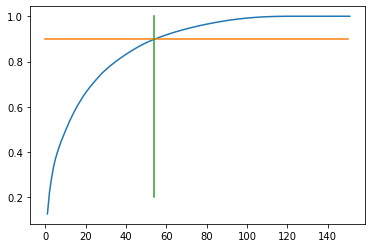

In [150]:
pca.fit(X_train_scaled)
evr=pca.explained_variance_ratio_
# Plotting scree plot
var_cumu=evr.cumsum()
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.plot([0,150],[0.90,0.90])
plt.plot([54,54],[0.2,1])

np.interp(0.95,var_cumu,list(range(1,len(var_cumu)+1)))

In [174]:
## setting value of 100 from pca recommendation

# pc=PCA(n_components=60,random_state=42)
# pc.fit(X_train_scaled)
# pd.DataFrame(pc.components_,columns=X_train_scaled.columns)

# X_test_scaled_pca=pc.transform(X_test_scaled)
# X_test_scaled_pca=pc.transform(X_test_scaled)

# pd.DataFrame(pc.components_,columns=X_train_scaled.columns)

In [151]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

## RFE

In [ ]:
from sklearn.feature_selection import RFE
dtx=DecisionTreeClassifier()


In [152]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

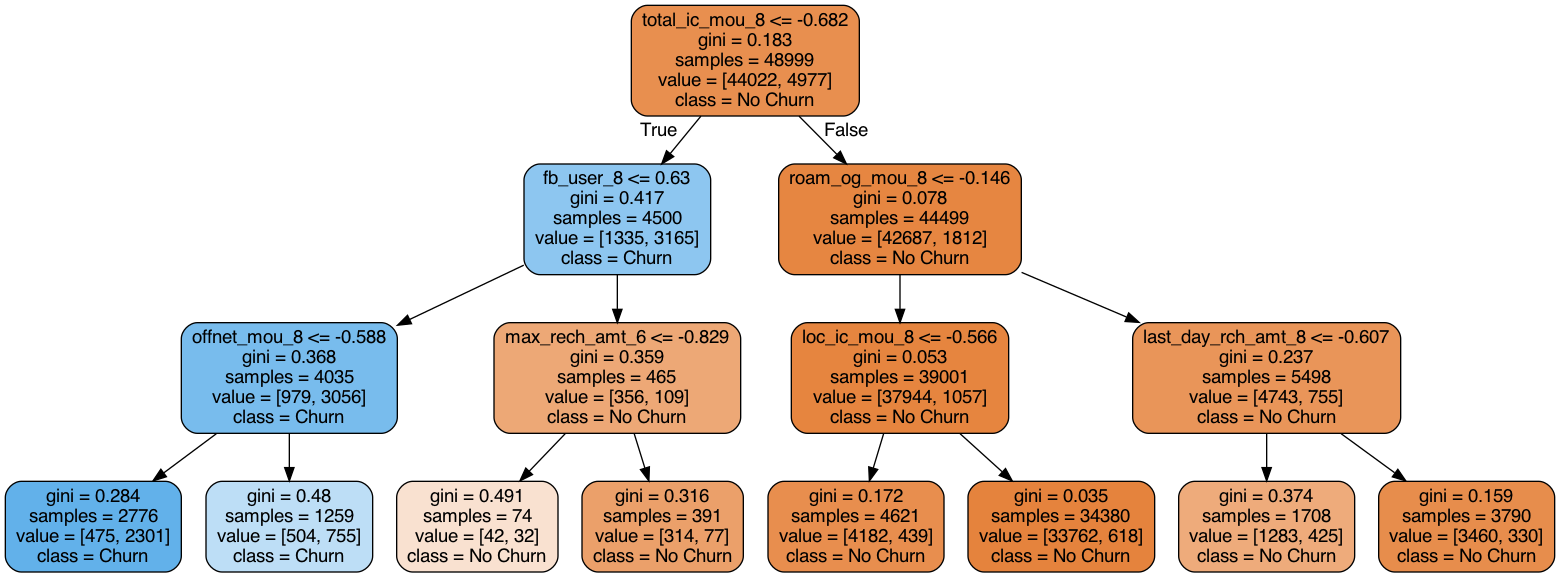

In [153]:
gph=get_dt_graph(dt,X_train_scaled)
Image(gph.create_png())

In [155]:
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

print(accuracy_score(y_train, y_train_pred))
cm=confusion_matrix(y_train, y_train_pred)

0.9408151186758913


### Evaluation of model

In [158]:
evaluate_model(dt,X_train_scaled,X_test_scaled,y_train,y_test)

==================================================Training data==================================================
Train Accuracy : 0.9408151186758913
Train Confusion Matrix:
[[43043   979]
 [ 1921  3056]]
Precision->0.757373
Recall->0.614025
F1_score->0.678207
-----------------------------------------------------------------------------------------------------------------
====================================================Test data====================================================
Test Accuracy : 0.941
Test Confusion Matrix:
[[18423   422]
 [  817  1338]]
Precision->0.760227
Recall->0.620882
F1_score->0.683525
-----------------------------------------------------------------------------------------------------------------


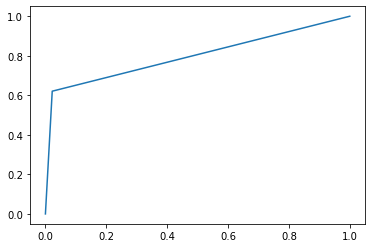

AUC Score->0.799244


In [160]:
from sklearn.metrics import roc_auc_score,roc_curve
auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,_=roc_curve(y_test,  y_test_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.show()
print("AUC Score->%f"%auc)

### Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3, min_samples_leaf=1)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [164]:
sample_tree = rf.estimators_[20]

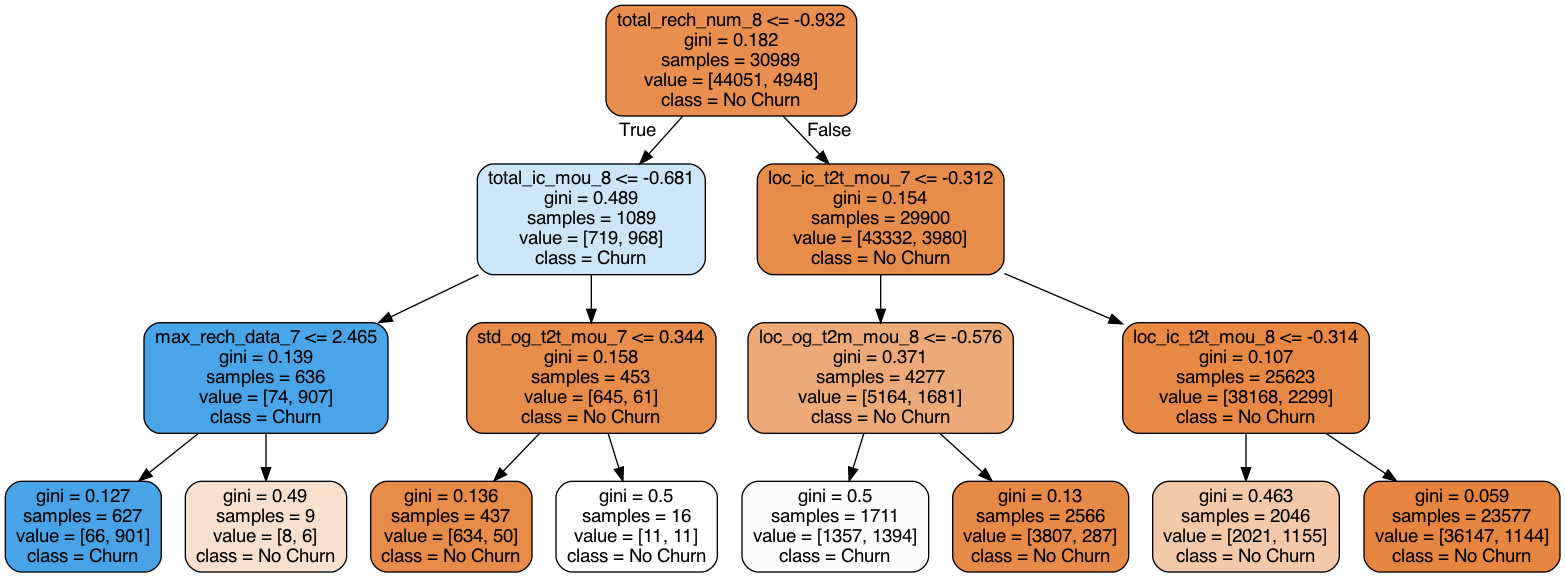

In [166]:
graph=get_dt_graph(sample_tree,X_train_scaled)
Image(graph.create_png())

In [167]:
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

In [168]:
evaluate_model(rf,X_train_scaled,X_test_scaled,y_train,y_test)

==================================================Training data==================================================
Train Accuracy : 0.9416518704463357
Train Confusion Matrix:
[[43159   863]
 [ 1996  2981]]
Precision->0.775494
Recall->0.598955
F1_score->0.675887
-----------------------------------------------------------------------------------------------------------------
====================================================Test data====================================================
Test Accuracy : 0.9422380952380952
Test Confusion Matrix:
[[18471   374]
 [  839  1316]]
Precision->0.778698
Recall->0.610673
F1_score->0.684525
-----------------------------------------------------------------------------------------------------------------


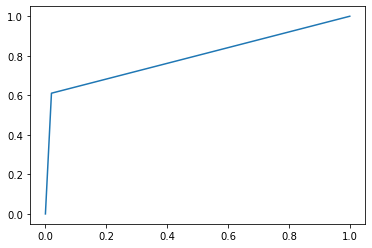

0.7954133704004891


In [175]:
from sklearn.metrics import roc_auc_score,roc_curve
auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,_=roc_curve(y_test,  y_test_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.show()
print(auc)

#### Grid search for hyper parameter tuning

In [27]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
from sklearn.model_selection import GridSearchCV

In [28]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10],
    'min_samples_leaf': [10, 20, 50, 100],
    'max_features': [2,3,4,5,6,7],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [29]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [30]:
%%time
grid_search.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits
CPU times: user 17.9 s, sys: 2.59 s, total: 20.5 s
Wall time: 8min 30s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [31]:
rf_best = grid_search.best_estimator_

In [32]:
rf_best

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       n_jobs=-1, random_state=42)

In [33]:
evaluate_model(rf_best,X_train_scaled,X_test_scaled,y_train,y_test)

==================================================Training data==================================================
Train Accuracy : 0.9441417171779016
Train Confusion Matrix:
[[43255   767]
 [ 1970  3007]]
Precision->0.796767
Recall->0.604179
F1_score->0.687236
-----------------------------------------------------------------------------------------------------------------
====================================================Test data====================================================
Test Accuracy : 0.9427142857142857
Test Confusion Matrix:
[[18498   347]
 [  856  1299]]
Precision->0.789186
Recall->0.602784
F1_score->0.683504
-----------------------------------------------------------------------------------------------------------------


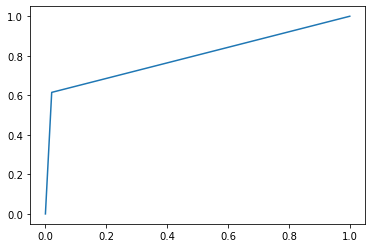

0.79710355390384


In [34]:
auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,_=roc_curve(y_test,  y_test_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.show()
print(auc)

In [35]:
sample_tree = rf_best.estimators_[0]

In [36]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.924838 to fit



### performing PCA

In [40]:
pca = PCA(random_state=42)

In [41]:
pca.fit(X_train_scaled)
pca.components_

array([[ 2.28302786e-03,  3.66133270e-02,  1.50244837e-01, ...,
        -1.51123758e-02,  1.38189657e-01,  5.20876983e-02],
       [-8.98316220e-04, -2.27883300e-02,  1.32271463e-01, ...,
         9.42198309e-03,  1.22625766e-01, -1.31992946e-01],
       [ 6.69986199e-04,  1.08677004e-01, -1.40528140e-02, ...,
         1.28451441e-03, -1.79469781e-02, -1.79790856e-01],
       ...,
       [-0.00000000e+00, -3.77926856e-14, -3.15280876e-16, ...,
        -1.94289029e-16, -9.02056208e-17,  2.02842951e-13],
       [-0.00000000e+00,  7.57911463e-14, -4.72907885e-16, ...,
         1.21430643e-16,  3.46944695e-17,  1.92172667e-14],
       [-0.00000000e+00,  1.52909478e-14, -3.49737622e-17, ...,
         1.14491749e-16,  4.85722573e-17, -2.16653518e-13]])

In [42]:
pca.components_.shape

(151, 151)

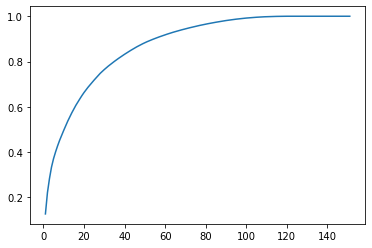

In [55]:
xx=np.array(pca.explained_variance_ratio_)
var_cumu=xx.cumsum()
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [57]:
pc2 = PCA(n_components=100, random_state=42)

In [58]:
X_train_scaled_PCA = pc2.fit_transform(X_train_scaled)

In [59]:
X_train_scaled_PCA.shape

(48999, 100)

In [177]:
import os
os.getcwd()

'/Users/v0a0048/Desktop/upgrad/Module/telecom'

IsADirectoryError: [Errno 21] Is a directory: '/Users/v0a0048/Desktop/upgrad/Module/telecom'